In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import math

In [4]:
df = pd.read_csv('../data/heart_failure_clinical_records_dataset.csv')

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.shape

(299, 13)

In [7]:
df['DEATH_EVENT'].sum() / df.shape[0]

0.3210702341137124

In [8]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [9]:
binary_vars = "anaemia diabetes high_blood_pressure smoking".split()
multival_vars = [var for var in list(df.columns) if var not in binary_vars + ["sex", "DEATH_EVENT"]]
print("Binary variables:", binary_vars)
print("Multi-value variables:", multival_vars)

Binary variables: ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']
Multi-value variables: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


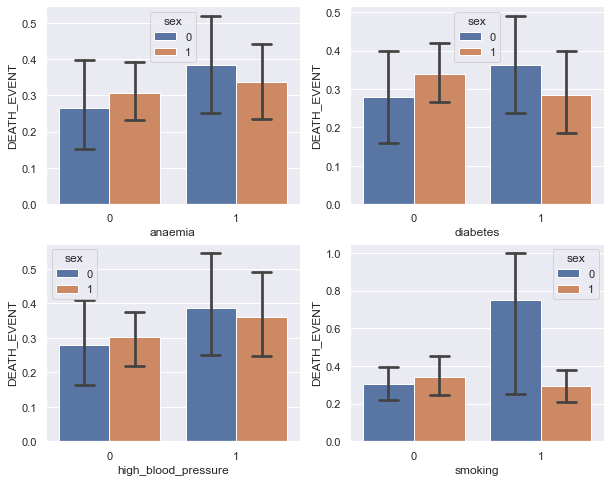

In [10]:
fig, ax = plt.subplots(2, 2, squeeze=False, figsize=(10, 8))
for i in range(2):
    for j in range(2):
        sns.barplot(x=binary_vars[2*i+j], y='DEATH_EVENT', hue='sex', data=df, ax=ax[i, j], capsize=.15)

Perhaps surprisingly, the categorical features: anaemia, diabetes, hypertension and smoking, do not exhibit statistically significant impact on the patient survival prospects. Neither does the sex.
Curiously, the big uncertainty for the smoking women (`sex = 0`) must be reflective of very few patients in this category.

In [11]:
df.query('sex == 0 & smoking == 1')['DEATH_EVENT']

41     1
54     1
76     0
105    1
Name: DEATH_EVENT, dtype: int64

Indeed there were only 4 such women and 3 have passed away, yielding 75% value of the bar height and big uncertainty.

In [12]:
# def a_over_b_err(a, b):
#     def err(x):
#         return np.sqrt(x)
#     return a/b * np.sqrt((err(a)/a)**2 + (err(b)/b)**2 -2*err(a)*err(b)/a/b)
# a_over_b_err(3, 4)

In [13]:
df[df["DEATH_EVENT"] == 0]['age'].mean()

58.761906403940884

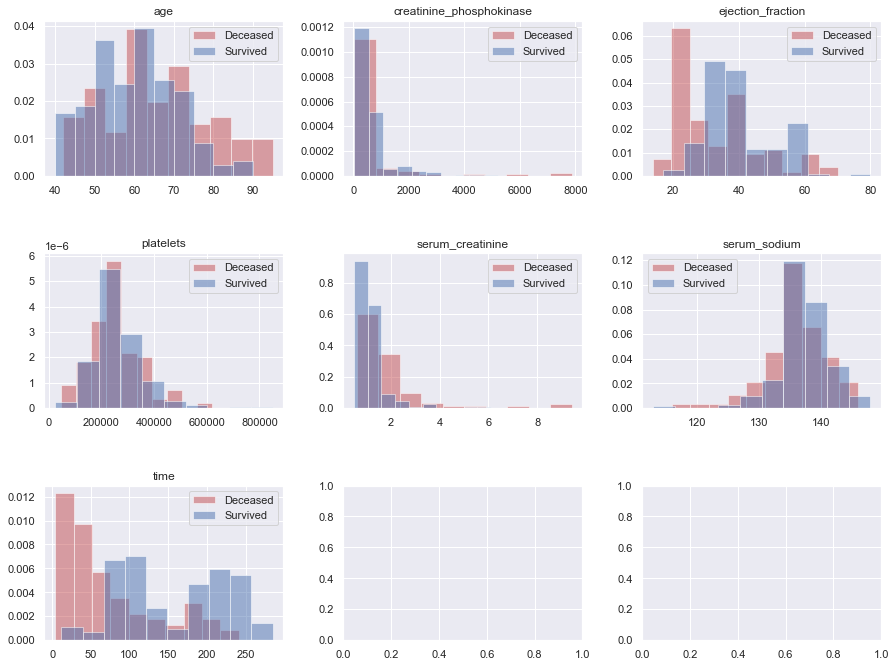

In [14]:
def print_fig(data, cols, ncols=3, figsize=(15,8)):
    nrows = math.ceil(len(cols) / ncols)
    fig, ax = plt.subplots(nrows, ncols, 
                           squeeze=False, figsize=figsize)
    for i in range(nrows):
        for j in range(ncols):
            if i * nrows + j > len(cols) - 1:
                break
            cat1 = data[data["DEATH_EVENT"] == 1]
            cat2 = data[data["DEATH_EVENT"] == 0]
            cat1[cols[i*nrows+j]].hist(alpha=0.5, ax=ax[i, j], color='r', density=True, label='Deceased')
            cat2[cols[i*nrows+j]].hist(alpha=0.5, ax=ax[i, j], color='b', density=True, label='Survived')
            ax[i, j].set_title(cols[i*nrows+j])
            ax[i, j].legend(loc='best')
            plt.subplots_adjust(hspace=0.5, wspace=0.25, top=1.2)
print_fig(data=df, cols=multival_vars)            
# TODO: don't plot empty subplots: create subplots on demand

- **age**: patients above the age of 70 are obviously at a higher risk
- **ejection fraction** is a strong predictor, especially below around 30 units
- **serum creatinine** is also a very strong feature, specifically about around 2 units
- **serum sodium** might be a helpful feature, but a little less so than the two previous ones
- **follow-up duration (time)**: We can tell that the patient chance to die in the follow-up period roughly follows an exponential distribution, for those that will not survive, as one might expect. The meaning of the follow-up period for the survivors is less clear: it seems it merely reflects how long these patients were monitored. In any case, this variable can help distinguish the two categories of patients.

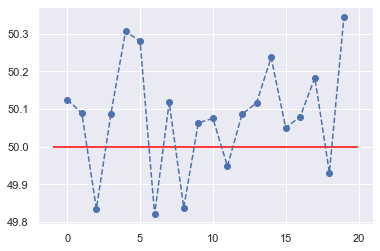

In [15]:
plt.plot(np.array([np.random.binomial(100000, p=0.5) for _ in range(20)])\
         /1000, 'bo--')
plt.hlines(y=50.000, xmin=plt.xlim()[0], xmax=plt.xlim()[1], color='red')

# Train set and test set
It is time to split the dataset into train and test sets.
Due to rather small statistics, we need to use stratified sampling to ensure the subgroups (i.e. surviving and deceased patients, and train/test patients) are representative of the population (i.e. the full dataset).

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.5,
            train_size=None)

In [17]:
train_set, test_set = train_test_split(df, test_size=0.4, random_state=42)

In [18]:
train_set

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
232,40.000,1,129,0,35,0,255000.00,0.9,137,1,0,209,0
182,65.000,0,395,1,25,0,265000.00,1.2,136,1,1,154,1
180,40.000,0,478,1,30,0,303000.00,0.9,136,1,0,148,0
137,68.000,1,646,0,25,0,305000.00,2.1,130,1,0,108,0
251,55.000,0,572,1,35,0,231000.00,0.8,143,0,0,215,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,60.667,1,151,1,40,1,201000.00,1.0,136,0,0,172,0
71,58.000,0,582,1,35,0,122000.00,0.9,139,1,1,71,0
106,55.000,0,748,0,45,0,263000.00,1.3,137,1,0,88,0
270,44.000,0,582,1,30,1,263358.03,1.6,130,1,1,244,0


In [19]:
X_train = train_set.drop("DEATH_EVENT", axis=1) # drop labels for training set
y_train = train_set["DEATH_EVENT"].copy()
X_test = test_set.drop("DEATH_EVENT", axis=1) # drop labels for test set
y_test = test_set["DEATH_EVENT"].copy()

In [20]:
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
232,40.000,1,129,0,35,0,255000.00,0.9,137,1,0,209
182,65.000,0,395,1,25,0,265000.00,1.2,136,1,1,154
180,40.000,0,478,1,30,0,303000.00,0.9,136,1,0,148
137,68.000,1,646,0,25,0,305000.00,2.1,130,1,0,108
251,55.000,0,572,1,35,0,231000.00,0.8,143,0,0,215
...,...,...,...,...,...,...,...,...,...,...,...,...
188,60.667,1,151,1,40,1,201000.00,1.0,136,0,0,172
71,58.000,0,582,1,35,0,122000.00,0.9,139,1,1,71
106,55.000,0,748,0,45,0,263000.00,1.3,137,1,0,88
270,44.000,0,582,1,30,1,263358.03,1.6,130,1,1,244


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [22]:
pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

X_train_tr = pipeline.fit_transform(X_train)

In [23]:
X_train_tr

array([[-1.81904094,  1.1641577 , -0.47395701, ...,  0.80137497,
        -0.67474777,  0.93495302],
       [ 0.45560719, -0.85899015, -0.20260175, ...,  0.80137497,
         1.48203528,  0.23763389],
       [-1.81904094, -0.85899015, -0.11793074, ...,  0.80137497,
        -0.67474777,  0.16156272],
       ...,
       [-0.45425206, -0.85899015,  0.15750505, ...,  0.80137497,
        -0.67474777, -0.59914906],
       [-1.45509724, -0.85899015, -0.01183696, ...,  0.80137497,
         1.48203528,  1.37870156],
       [ 1.82039607, -0.85899015,  0.31052494, ...,  0.80137497,
         1.48203528, -0.61182759]])

In [24]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l2', C=1.0, random_state=0,
                             n_jobs=-1)
log_reg.fit(X_train_tr, y_train)

LogisticRegression(n_jobs=-1, random_state=0)

In [25]:
some_data = X_train_tr[:5].copy()
log_reg.predict(some_data)

array([0, 0, 0, 0, 0], dtype=int64)

In [26]:
X_train_tr

array([[-1.81904094,  1.1641577 , -0.47395701, ...,  0.80137497,
        -0.67474777,  0.93495302],
       [ 0.45560719, -0.85899015, -0.20260175, ...,  0.80137497,
         1.48203528,  0.23763389],
       [-1.81904094, -0.85899015, -0.11793074, ...,  0.80137497,
        -0.67474777,  0.16156272],
       ...,
       [-0.45425206, -0.85899015,  0.15750505, ...,  0.80137497,
        -0.67474777, -0.59914906],
       [-1.45509724, -0.85899015, -0.01183696, ...,  0.80137497,
         1.48203528,  1.37870156],
       [ 1.82039607, -0.85899015,  0.31052494, ...,  0.80137497,
         1.48203528, -0.61182759]])

In [27]:
pd.DataFrame(pipeline.inverse_transform(some_data), columns=df.columns[:-1])

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,40.0,1.0,129.0,0.0,35.0,0.0,255000.0,0.9,137.0,1.0,0.0,209.0
1,65.0,0.0,395.0,1.0,25.0,0.0,265000.0,1.2,136.0,1.0,1.0,154.0
2,40.0,0.0,478.0,1.0,30.0,0.0,303000.0,0.9,136.0,1.0,0.0,148.0
3,68.0,1.0,646.0,0.0,25.0,0.0,305000.0,2.1,130.0,1.0,0.0,108.0
4,55.0,0.0,572.0,1.0,35.0,0.0,231000.0,0.8,143.0,0.0,0.0,215.0


In [28]:
y_train[:5]

232    0
182    1
180    0
137    0
251    0
Name: DEATH_EVENT, dtype: int64

In [29]:
# Cross validation
from sklearn.model_selection import cross_val_score

In [30]:
scores = cross_val_score(log_reg, X_train_tr, y_train,
                         scoring="accuracy", cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Std dev:", scores.std())

Scores: [0.80555556 0.91666667 0.88888889 0.66666667 0.8       ]
Mean score: 0.8155555555555555
Std dev: 0.08730533902472529


In [31]:
scores

array([0.80555556, 0.91666667, 0.88888889, 0.66666667, 0.8       ])

In [32]:
scores.std()

0.08730533902472529

In [33]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train_tr, y_train)

RandomForestClassifier(random_state=42)

In [34]:
scores = cross_val_score(forest_clf, X_train_tr, y_train,
                         scoring="accuracy", cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Std dev:", scores.std())

Scores: [0.80555556 0.88888889 0.88888889 0.80555556 0.94285714]
Mean score: 0.8663492063492063
Std dev: 0.05340650687008557


In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [20, 21, 22], 'max_features': [1, 2, 3]},
    #{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True,
                           n_jobs=-1)
grid_search.fit(X_train_tr, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [1, 2, 3],
                          'n_estimators': [20, 21, 22]}],
             return_train_score=True, scoring='accuracy')

In [36]:
grid_search.best_estimator_

RandomForestClassifier(max_features=2, n_estimators=21, random_state=42)

In [37]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 21}

In [38]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022741,0.004697,0.002591,0.000798,1,20,"{'max_features': 1, 'n_estimators': 20}",0.750000,0.777778,0.833333,...,0.793492,0.032259,7,0.993007,1.000000,1.0,1.0,1.000000,0.998601,0.002797
1,0.035107,0.005691,0.003192,0.000747,1,21,"{'max_features': 1, 'n_estimators': 21}",0.722222,0.777778,0.833333,...,0.782222,0.036243,9,1.000000,1.000000,1.0,1.0,1.000000,1.000000,0.000000
2,0.042487,0.001738,0.003391,0.000489,1,22,"{'max_features': 1, 'n_estimators': 22}",0.750000,0.777778,0.833333,...,0.793333,0.027977,8,1.000000,1.000000,1.0,1.0,1.000000,1.000000,0.000000
3,0.038297,0.002491,0.003192,0.000399,2,20,"{'max_features': 2, 'n_estimators': 20}",0.805556,0.861111,0.833333,...,0.855238,0.047201,6,0.993007,1.000000,1.0,1.0,0.993056,0.997213,0.003414
4,0.036702,0.000746,0.003194,0.000398,2,21,"{'max_features': 2, 'n_estimators': 21}",0.805556,0.944444,0.916667,...,0.888571,0.057967,1,1.000000,1.000000,1.0,1.0,1.000000,1.000000,0.000000
5,0.038696,0.000399,0.003392,0.000489,2,22,"{'max_features': 2, 'n_estimators': 22}",0.805556,0.944444,0.916667,...,0.888571,0.057967,1,1.000000,1.000000,1.0,1.0,1.000000,1.000000,0.000000
6,0.036101,0.000747,0.003191,0.000399,3,20,"{'max_features': 3, 'n_estimators': 20}",0.861111,0.944444,0.888889,...,0.877302,0.056881,3,1.000000,0.993007,1.0,1.0,1.000000,0.998601,0.002797
7,0.037100,0.000399,0.003191,0.000399,3,21,"{'max_features': 3, 'n_estimators': 21}",0.833333,0.944444,0.888889,...,0.871746,0.059488,5,1.000000,0.993007,1.0,1.0,1.000000,0.998601,0.002797
8,0.037499,0.001017,0.003591,0.000489,3,22,"{'max_features': 3, 'n_estimators': 22}",0.861111,0.944444,0.888889,...,0.877302,0.056881,3,1.000000,0.993007,1.0,1.0,0.993056,0.997213,0.003414


In [39]:
pd.DataFrame(grid_search.cv_results_)['mean_test_score'].mean()

0.8475308641975308

In [40]:
pd.DataFrame(grid_search.cv_results_)['mean_test_score'].std()

0.044595132240480305

In [41]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.07276743, 0.0082997 , 0.07937128, 0.0145291 , 0.14222282,
       0.01281684, 0.07677559, 0.14434957, 0.07910009, 0.02572981,
       0.00807836, 0.3359594 ])

In [42]:
sorted(zip(feature_importances, df.columns[:-1]), reverse=True)

[(0.33595939839567285, 'time'),
 (0.14434956898386767, 'serum_creatinine'),
 (0.14222282446683784, 'ejection_fraction'),
 (0.07937128193684642, 'creatinine_phosphokinase'),
 (0.07910008800280469, 'serum_sodium'),
 (0.07677559474187357, 'platelets'),
 (0.07276742955281437, 'age'),
 (0.02572981391156325, 'sex'),
 (0.014529098048612672, 'diabetes'),
 (0.012816838124891853, 'high_blood_pressure'),
 (0.008299703744316763, 'anaemia'),
 (0.008078360089898104, 'smoking')]

In [43]:
features_ranking = sorted(zip(df.columns[:-1], feature_importances), reverse=True, key=lambda x: x[1])

In [44]:
features = [x[0] for x in features_ranking]
ranks = [x[1] for x in features_ranking]

Text(0.5, 0, 'Score')

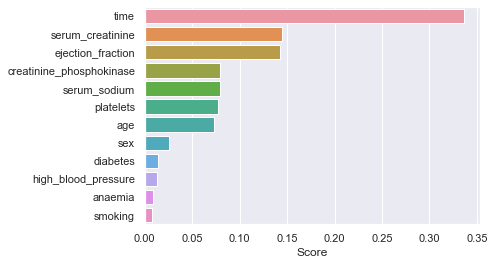

In [45]:
sns.barplot(y=features, x=ranks, orient='h')
plt.xlabel('Score')

In [46]:
# Will we get the same x-validation performance using only the best two features?

In [47]:
X_train_tr_best_features = pd.DataFrame(X_train_tr, columns=df.columns[:-1])[['time', 'serum_creatinine']]

In [48]:
clf = RandomForestClassifier(**grid_search.best_params_, random_state=42)

clf.fit(X_train_tr_best_features, y_train)

RandomForestClassifier(max_features=2, n_estimators=21, random_state=42)

In [49]:
scores = cross_val_score(clf, X_train_tr_best_features, y_train,
                         scoring="accuracy", cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Std dev:", scores.std())

Scores: [0.75       0.91666667 0.83333333 0.75       0.88571429]
Mean score: 0.8271428571428572
Std dev: 0.06838930841636674


In [50]:
# strangely nope!
# Let's try using the full set

In [51]:
scores = cross_val_score(clf, X_train_tr, y_train,
                         scoring="accuracy", cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Std dev:", scores.std())

Scores: [0.80555556 0.94444444 0.91666667 0.83333333 0.94285714]
Mean score: 0.8885714285714286
Std dev: 0.05796715866765426


In [52]:
# Again, after retraining it
clf.fit(X_train_tr, y_train)
scores = cross_val_score(clf, X_train_tr, y_train,
                         scoring="accuracy", cv=5)
print("Scores:", scores)
print("Mean score:", scores.mean())
print("Std dev:", scores.std())

Scores: [0.80555556 0.94444444 0.91666667 0.83333333 0.94285714]
Mean score: 0.8885714285714286
Std dev: 0.05796715866765426


In [53]:
# Let's use regression to get probabilities


TODO:
- [ ] Use regression or otherwise get probabilities
- [ ] Deploy light-weight (perhaps not optimised) algorithm using Flask
- [ ] Test on PythonAnywhere
- [ ] Plot decision regions to understand how/why it works
- [ ] Further optimise the Random Forest
- [ ] Implement other algorithms: KNN, SVM
- [ ] Use PCA: does it detect the same features? Is it useful in such a simple project?
- [ ] Does MLP make sense in this project?
- [ ] Is train/test split optimal? Is it really stratified?
- [ ] Polish Flask interface: nice forms?
- [ ] Save the model on disk

In [54]:
clf_best = grid_search.best_estimator_

In [55]:
# Save the best estimator
# First retrain it on a smaller array so the unimportant features are not required in application
clf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
clf.fit(X_train_tr_best_features, y_train)

RandomForestClassifier(max_features=2, n_estimators=21, random_state=42)

In [64]:
import joblib
joblib.dump(clf, "cardio_model.pkl")
# Train the pipeline to require exactly 2 features
X_train_best_features = pd.DataFrame(X_train, columns=df.columns[:-1])[['time', 'serum_creatinine']]
pipeline.fit(X_train_best_features)
joblib.dump(pipeline, 'pipeline.pkl')

['pipeline.pkl']

In [57]:
# Test the model on hypothetical new cases
model = joblib.load("cardio_model.pkl")

In [58]:
X_train_tr_best_features[:3]

,time,serum_creatinine
0,0.934953,-0.465356
1,0.237634,-0.178119
2,0.161563,-0.465356


In [59]:
y_train[:3]

232    0
182    1
180    0
Name: DEATH_EVENT, dtype: int64

In [60]:
model.predict(X_train_tr_best_features[:3])

array([0, 1, 0], dtype=int64)

In [61]:
X_train_tr_best_features[:3].shape

(3, 2)

We need to feed the model some $n\times 2$ matrix.

# Evalute model performance on the test set

In [62]:
# TODO: Before I do it, I should implement F1 score, precision/recall, ROC curves and so on in the training.
# Otherwise I might be biased and select a model better performing on the test sample, overtraining it.

# For now, let's just trust "this model is OK" and focus on deployment.

In [66]:
X_train_tr.shape

(179, 12)

In [68]:
X_train_tr_best_features.shape

(179, 2)

In [69]:
type(X_train_tr_best_features)

pandas.core.frame.DataFrame

In [ ]:
model.predict(np.array([[250, ]]))